In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import sklearn
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from torch.utils.data.dataset import random_split
from torch.utils.data.dataset import TensorDataset
from torch.utils.data.dataloader import DataLoader

In [43]:
def make_train_step(model, loss_fn, optimizer):
    """Builds function that performs a step in the train loop"""
    
    def train_step(x, y):
        model.train()
        y_pred = model(x)
        loss = loss_fn(y, y_pred.squeeze())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        return loss.item()
    
    return train_step

In [64]:
# Data
X = torch.from_numpy(np.random.uniform(0, 10, 100))
y = 5 + X*10
X = X.unsqueeze(1)

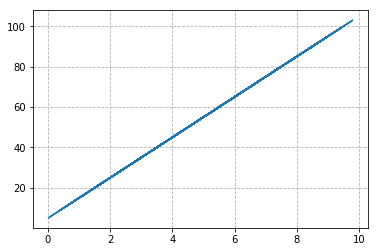

In [66]:
fig, ax = plt.subplots()
ax.plot(X[:, 0].numpy(), y.numpy())
ax.grid(ls='--')

In [67]:
# Dataset
dataset = TensorDataset(X, y)
train_dataset, test_dataset = random_split(dataset, [80, 20])
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [68]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
                
    def forward(self, x):
        return self.linear(x)

In [69]:
# Device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [96]:
LR = 1e-1
N_EPOCHS = 1000

In [97]:
model = LinearRegression().to(device).double()
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=LR)

In [98]:
train_step = make_train_step(model, loss_fn, optimizer)

In [99]:
losses = []

for epoch in range(N_EPOCHS):
    model.train()
    for x_batch, y_batch in train_dataloader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        loss = train_step(x_batch, y_batch)
        losses.append(loss)

    model.eval()
    
    if (epoch % 100):
        continue
    
    with torch.no_grad():
        for x_batch, y_batch in test_dataloader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            
            y_pred = model(x_batch)
            loss = loss_fn(y_batch, y_pred.squeeze())
            print(f"Validation loss: {loss}")

Validation loss: 3385.5396667871764
Validation loss: 1.5413365577387255
Validation loss: 0.5401777661437209
Validation loss: 0.1234448367382232
Validation loss: 0.018055413354434963
Validation loss: 0.001648010206464821
Validation loss: 8.876245921809624e-05
Validation loss: 2.5118237396797804e-06
Validation loss: 3.4323420743477866e-08
Validation loss: 2.0758257240256405e-10


In [100]:
list(model.linear.parameters())

[Parameter containing:
 tensor([[10.0000]], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([5.0000], dtype=torch.float64, requires_grad=True)]